<a href="https://colab.research.google.com/github/selvatharane/DL_PROJECTS/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


(50000, 32, 32, 3)

5000-training samples 32,32-image size 3-rgb samples

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

converting 2d to 1d

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
classes[9]

'truck'

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


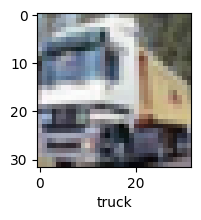

In [ ]:
plot_sample(X_train,y_train,1)

each index has different images hence the first index contains truck # data exploration

In [ ]:
X_train = X_train/255
X_test = X_test/255

pixel of each image ranges from 0-255 so dividing by 255 and hence normalising the value between o to 1

ANN architecture

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 185s 117ms/step - accuracy: 0.3057 - loss: 1.9268
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 184s 106ms/step - accuracy: 0.4194 - loss: 1.6482
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 188s 120ms/step - accuracy: 0.4524 - loss: 1.5505
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.4785 - loss: 1.4858
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 246s 138ms/step - accuracy: 0.4921 - loss: 1.4366


categorical_entropy=different number of categories ie,0 0 0 0 0 0 0 0 1 0
sparse categorical entropy - 8 directly the eighth category because here we are directly using the  classes

In [ ]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.4652 - loss: 1.4943


[1.4977257251739502, 0.4611999988555908]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.70      0.50      1000
           1       0.75      0.42      0.54      1000
           2       0.33      0.43      0.38      1000
           3       0.30      0.47      0.36      1000
           4       0.54      0.21      0.30      1000
           5       0.43      0.34      0.38      1000
           6       0.52      0.55      0.53      1000
           7       0.71      0.37      0.48      1000
           8       0.57      0.60      0.58      1000
           9       0.57      0.51      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



CNN Architecture

In [ ]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),#convolution+relu
    layers.MaxPooling2D((2,2)),#pooling

    layers.Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


softmax 1:0.45 2:0.67
1.0.45/(0.45+0.67)=0.40178
2.0.67/(0.45+0.67)=0.59821

In [ ]:
cnn.compile(optimizer = 'adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3845 - loss: 1.6912
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 50ms/step - accuracy: 0.6004 - loss: 1.1420
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 54ms/step - accuracy: 0.6540 - loss: 0.9862
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 48ms/step - accuracy: 0.6873 - loss: 0.8953
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 43ms/step - accuracy: 0.7117 - loss: 0.8223
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.7310 - loss: 0.7743
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7480 - loss: 0.7237
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.7581 - loss: 0.6944
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.7730 - loss: 0.6499
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 88s 45ms/step - accuracy: 0.7881 - loss: 0.6012


comparison : ann-after 5 epochs the accuracy is 49
cnn - after 5 epochs the accuracy is 49

more the epochs ,more the accuracy

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6955 - loss: 0.9258


[0.9275208711624146, 0.6952000260353088]

In [ ]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

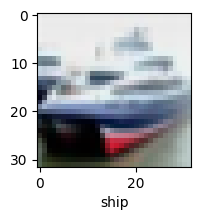

In [ ]:
#normal prediction
plot_sample(X_test,y_test,1)

In [ ]:
#model prediction
y_pred = cnn.predict(X_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


array([[1.6248742e-01, 4.3018188e-04, 1.9808048e-03, 7.2528946e-01,
        1.1438808e-03, 1.5663823e-02, 4.0756604e-03, 2.5981279e-05,
        8.7919377e-02, 9.8344462e-04],
       [9.6634170e-03, 8.5118107e-02, 8.5008617e-07, 3.9819682e-07,
        8.0592955e-08, 1.9085485e-08, 7.6406224e-09, 3.2805794e-09,
        9.0496659e-01, 2.5050584e-04],
       [4.3117803e-02, 2.2586963e-01, 8.1061815e-05, 3.4502530e-03,
        1.6800323e-04, 2.9794694e-04, 2.8153590e-04, 4.3264887e-04,
        7.1439451e-01, 1.1906649e-02],
       [9.7508311e-01, 4.7123278e-03, 1.1727737e-03, 2.3254192e-04,
        2.0059113e-05, 2.2548732e-06, 9.8176724e-06, 1.8679628e-05,
        1.8743685e-02, 4.6011432e-06],
       [2.1764736e-05, 3.0127450e-05, 1.4853766e-02, 1.1714945e-02,
        8.1299996e-01, 2.9501868e-03, 1.5732445e-01, 8.0173959e-06,
        9.1612856e-05, 5.0175267e-06]], dtype=float32)

In [ ]:
#use argmax function to find the maximum value
np.argmax(y_pred[0]) #3 is the maximum element

3

In [ ]:
y_classes = [np.argmax(element) for element in y_pred ]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5] # error may occurs bcoz the accuracy is 70%

array([3, 8, 8, 0, 6], dtype=uint8)

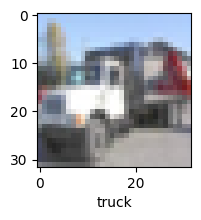

In [ ]:
#actual value
plot_sample(X_test,y_test,45)

In [ ]:
#predicted_value
classes[y_classes[45]]

'truck'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.79      0.72      1000
           1       0.84      0.81      0.82      1000
           2       0.61      0.57      0.59      1000
           3       0.56      0.42      0.48      1000
           4       0.65      0.63      0.64      1000
           5       0.60      0.62      0.61      1000
           6       0.86      0.67      0.76      1000
           7       0.62      0.82      0.71      1000
           8       0.77      0.84      0.81      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



Infer:low scoring ann and high scoring cnn
Max pooling reduces the dimensions in cnn